# Carga y exploracion de datos bank-additional.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)

In [2]:
# Carga de archivo CSV
df_bank = pd.read_csv(r"D:\Data & Analytics\Python for data\Proyecto EDA/bank-additional.csv")
df_bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [3]:
# Ver informacion general del dataframe
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

In [5]:
# Comprobar valores nulos
df_bank.isnull().sum()

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [6]:
# Comprobar valores nulos (NaN)
df_bank.isna().sum()

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [7]:
# Verificar duplicados
df_bank.duplicated().sum()

np.int64(0)

# Limpieza y transformación de datos bank-additional.csv

In [8]:
# Se Elimina columna que no aporta valor
if "Unnamed: 0" in df_bank.columns:
    df_bank.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
# Rellenar valores nulos con "Mediana"
df_bank["age"].fillna(df_bank["age"].median(), inplace=True)

# Convierte "age" a entero
df_bank["age"] = df_bank["age"].astype("int")

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\4226099746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank["age"].fillna(df_bank["age"].median(), inplace=True)


In [10]:
# Convertir variables binarias a categoria
df_bank["default"] = df_bank["default"].astype("category")
df_bank["housing"] = df_bank["housing"].astype("category")
df_bank["loan"] = df_bank["loan"].astype("category")
df_bank["y"] = df_bank["y"].astype("category")

In [11]:
# Para este codigo me ayude con la AI
# Modifica valores numericos representados como texto (con coma decimal(remplaza "," x "."))
for col in ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    df_bank[col] = df_bank[col].astype(str).str.replace(',', '.')
    df_bank[col] = pd.to_numeric(df_bank[col], errors='coerce')  # Convertir a float, NaNs si falla

In [12]:
# Rellena valores nulos con "Media"
df_bank["cons.price.idx"].fillna(df_bank["cons.price.idx"].mean(), inplace=True)
df_bank["euribor3m"].fillna(df_bank["euribor3m"].mean(), inplace=True)

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\196646980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank["cons.price.idx"].fillna(df_bank["cons.price.idx"].mean(), inplace=True)
C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\196646980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [13]:
# Rellena categoricos con "modo"
df_bank["default"].fillna(df_bank["default"].mode()[0], inplace=True)
df_bank["housing"].fillna(df_bank["housing"].mode()[0], inplace=True)
df_bank["loan"].fillna(df_bank["loan"].mode()[0], inplace=True)

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2900781880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank["default"].fillna(df_bank["default"].mode()[0], inplace=True)
C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2900781880.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [14]:
# Rellena categoricos con "unknown"
df_bank["job"].fillna("unknown", inplace=True)
df_bank["marital"].fillna("unknown", inplace=True)
df_bank["education"].fillna("unknown", inplace=True)

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2128030924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank["job"].fillna("unknown", inplace=True)
C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2128030924.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [ ]:
# Remplazamos "Nan" por "unknown"
df_bank["date"] = df_bank["date"].fillna("unknown")

In [16]:
# confirmo si hay valores nulos
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
date              0
latitude          0
longitude         0
id_               0
dtype: int64

In [17]:
#confirmo los cambio del "dtype"
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             43000 non-null  int64   
 1   job             43000 non-null  object  
 2   marital         43000 non-null  object  
 3   education       43000 non-null  object  
 4   default         43000 non-null  category
 5   housing         43000 non-null  category
 6   loan            43000 non-null  category
 7   contact         43000 non-null  object  
 8   duration        43000 non-null  int64   
 9   campaign        43000 non-null  int64   
 10  pdays           43000 non-null  int64   
 11  previous        43000 non-null  int64   
 12  poutcome        43000 non-null  object  
 13  emp.var.rate    43000 non-null  float64 
 14  cons.price.idx  43000 non-null  float64 
 15  cons.conf.idx   43000 non-null  float64 
 16  euribor3m       43000 non-null  float64 
 17  nr.employed 

In [18]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,38,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


# Carga y exploracion de datos customer-details.xlsx

In [19]:
# Cargar el archivo como objeto ExcelFile( si uso directamente pd.read_excel no tengo acceso directo a los nombres del resto de las hojas)
archivo_excel = pd.ExcelFile(r"D:\Data & Analytics\Python for data\Proyecto EDA\customer-details.xlsx")

In [20]:
# Ver nombres de hojas
print(archivo_excel.sheet_names)

['2012', '2013', '2014']


In [21]:
# Cargar todas las hojas en una lista de DataFrames
dfs_customers = [archivo_excel.parse(sheet) for sheet in archivo_excel.sheet_names]

# Unirlas en un solo DataFrame (si todas tienen la misma estructura)
df_customers = pd.concat(dfs_customers, ignore_index=True)

# Mostrar las primeras filas
df_customers.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [22]:
# Ver informacion general del dataframe
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


In [23]:
# Comprobar valores nulos
df_customers.isnull().sum()

Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [24]:
# Verificar duplicados
df_customers.duplicated().sum()

np.int64(0)

# Limpieza y transformación de datos de customer-details.xlsx

In [25]:
# Se Elimina columna que no aporta valor
if "Unnamed: 0" in df_customers.columns:
    df_customers.drop(columns=["Unnamed: 0"], inplace=True)

In [26]:
df_customers.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


# Analisis descriptivo de los datos

In [27]:
# Dimensiones Dataset df_bank
print("Dimensiones del dataset de campañas:", df_bank.shape)

df_bank.dtypes
df_bank.head()


Dimensiones del dataset de campañas: (43000, 23)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,38,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [28]:
# Dimensiones Dataset ddf_customers
print("Dimensiones del dataset de clientes:", df_customers.shape)

df_customers.dtypes
df_customers.head()


Dimensiones del dataset de clientes: (43170, 6)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [29]:
# Variables numericas – Campañas (df_bank)
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.741698,9.817735,17.000,33.00000,38.000000,46.00000,98.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.000000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.000000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.000000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.000000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.100000,1.40000,1.400
cons.price.idx,43000.0,93.574219,0.576365,92.201,93.07500,93.574219,93.99400,94.767
cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.800000,-36.40000,-26.900
euribor3m,43000.0,3.616521,1.538834,0.634,1.46600,4.076000,4.95900,5.045
nr.employed,43000.0,5166.852602,72.411125,4963.600,5099.10000,5191.000000,5228.10000,5228.100


In [30]:
# Variables categoricas – Campañas (df_bank)
categorical = ["job", "marital", "education", "contact", "poutcome"]

for col in categorical:
    print(f"\nDistribución en {col}:\n")
    print(df_bank[col].value_counts(normalize=True).round(2))


Distribución en job:

job
admin.           0.25
blue-collar      0.22
technician       0.16
services         0.10
management       0.07
retired          0.04
entrepreneur     0.04
self-employed    0.03
housemaid        0.03
unemployed       0.02
student          0.02
unknown          0.01
Name: proportion, dtype: float64

Distribución en marital:

marital
MARRIED     0.60
SINGLE      0.28
DIVORCED    0.11
unknown     0.00
Name: proportion, dtype: float64

Distribución en education:

education
university.degree      0.30
high.school            0.23
basic.9y               0.15
professional.course    0.13
basic.4y               0.10
basic.6y               0.06
unknown                0.04
illiterate             0.00
Name: proportion, dtype: float64

Distribución en contact:

contact
cellular     0.64
telephone    0.36
Name: proportion, dtype: float64

Distribución en poutcome:

poutcome
NONEXISTENT    0.86
FAILURE        0.10
SUCCESS        0.03
Name: proportion, dtype: float64


In [31]:
# Variables numericas – Campañas (df_customers)
df_customers.describe().T


,count,mean,min,25%,50%,75%,max,std
Income,43170.0,93227.389622,5841.0,49608.0,93009.5,136740.5,180802.0,50498.181989
Kidhome,43170.0,1.004749,0.0,0.0,1.0,2.0,2.0,0.815996
Teenhome,43170.0,0.998633,0.0,0.0,1.0,2.0,2.0,0.816008
Dt_Customer,43170,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,16.59129,1.0,9.0,17.0,25.0,32.0,9.241769


# Visualizacion de Datos df_bank

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\4028145136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_bank, x="y", palette="pastel")


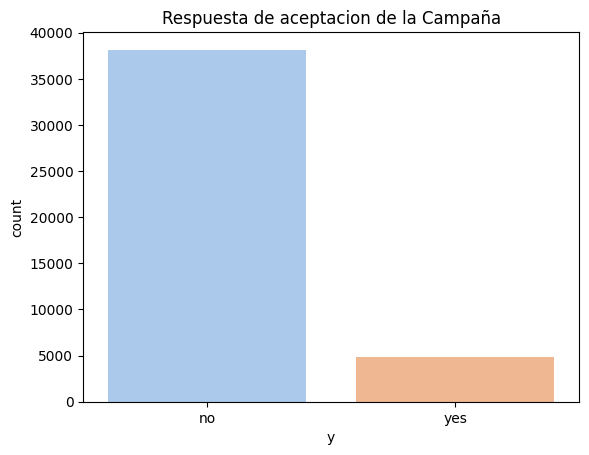

In [52]:
sns.countplot(data=df_bank, x="y", palette="pastel")
plt.title("Respuesta de aceptacion de la Campaña")
plt.show()

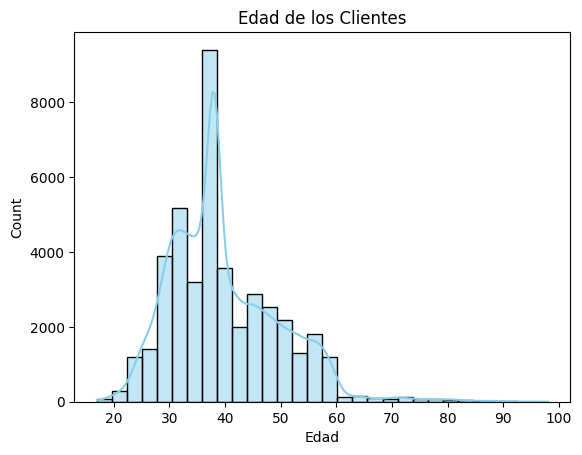

In [51]:
sns.histplot(df_bank["age"], bins=30, kde=True, color="skyblue")
plt.title("Edad de los Clientes")
plt.xlabel("Edad")
plt.show()

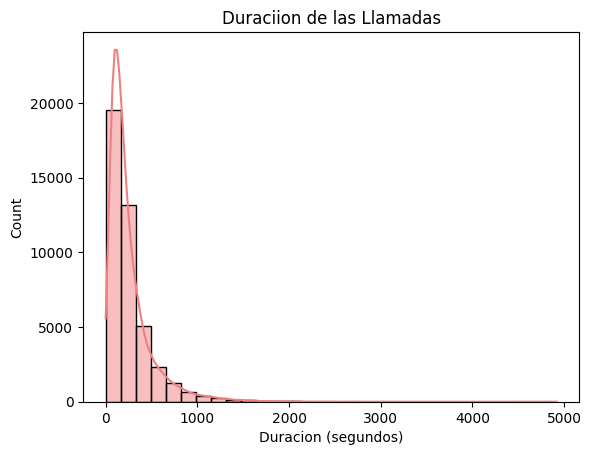

In [50]:
sns.histplot(df_bank["duration"], bins=30, kde=True, color="lightcoral")
plt.title("Duraciion de las Llamadas")
plt.xlabel("Duracion (segundos)")
plt.show()

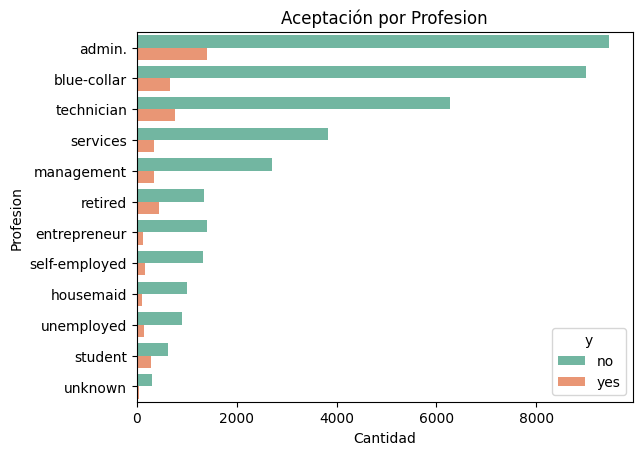

In [53]:
sns.countplot(data=df_bank, y="job", hue="y", order=df_bank["job"].value_counts().index, palette="Set2")
plt.title("Aceptación por Profesion")
plt.xlabel("Cantidad")
plt.ylabel("Profesion")
plt.show()

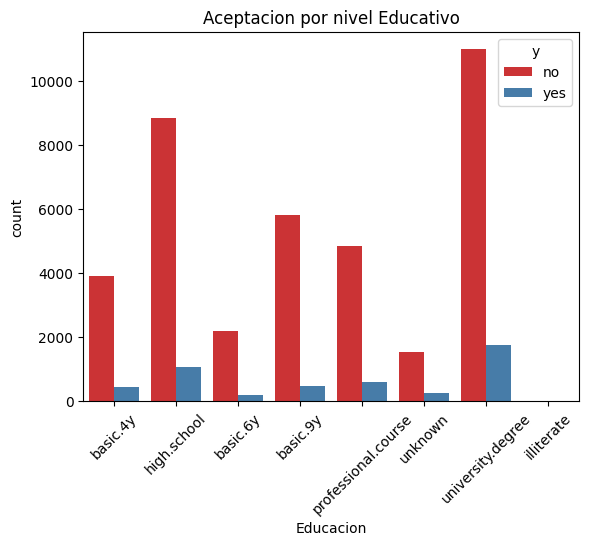

In [54]:
sns.countplot(data=df_bank, x="education", hue="y", palette="Set1")
plt.title("Aceptacion por nivel Educativo")
plt.xlabel("Educacion")
plt.xticks(rotation=45)
plt.show()

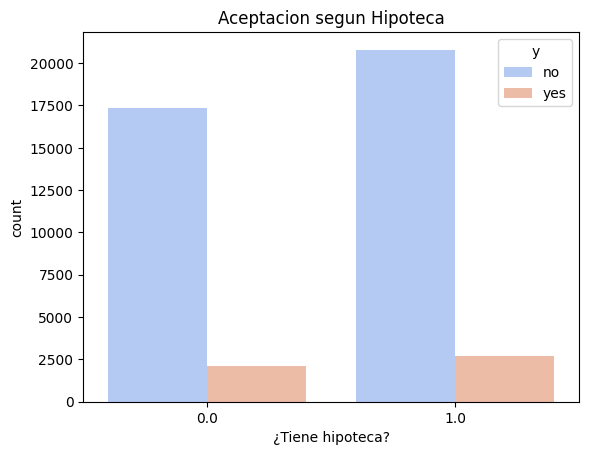

In [56]:
sns.countplot(data=df_bank, x="housing", hue="y", palette="coolwarm")
plt.title("Aceptacion segun Hipoteca")
plt.xlabel("¿Tiene hipoteca?")
plt.show()

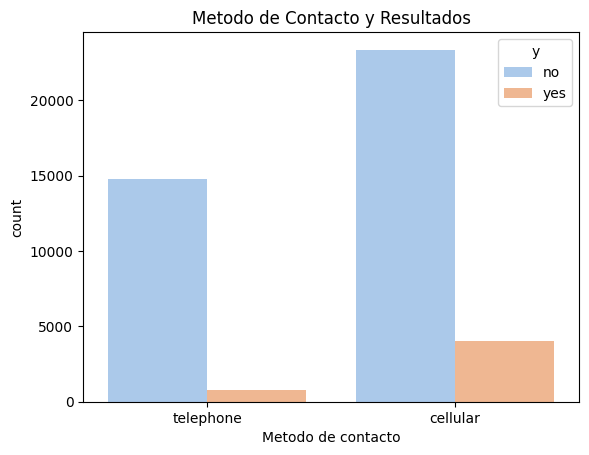

In [59]:
sns.countplot(data=df_bank, x="contact", hue="y", palette="pastel")
plt.title("Metodo de Contacto y Resultados")
plt.xlabel("Metodo de contacto")
plt.show()


C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2360505427.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bank, x='y', y='duration', palette='Set3')


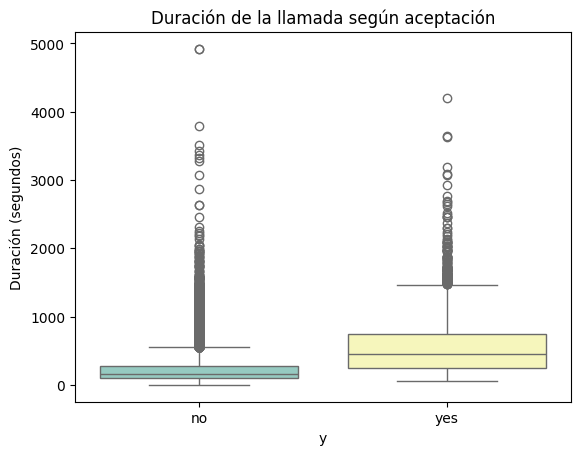

In [ ]:
sns.boxplot(data=df_bank, x="y", y="duration", palette="Set3")
plt.title("Duracion de la llamada segun aceptacion")
plt.ylabel("Duracion (segundos)")
plt.show()


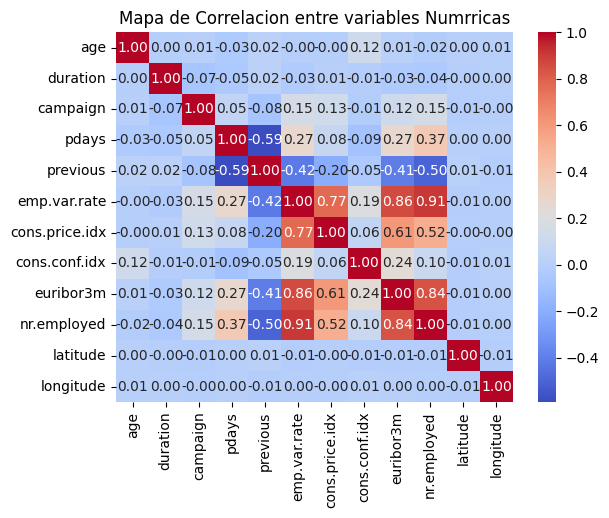

In [63]:
# Seleccionar columnas numericas relevantes
numeric_cols = df_bank.select_dtypes(include=["int64", "float64"]).drop(columns="id_", errors="ignore")

# Correlacion
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlacion entre variables Numrricas")
plt.show()


# Visualizacion de Datos df_customers

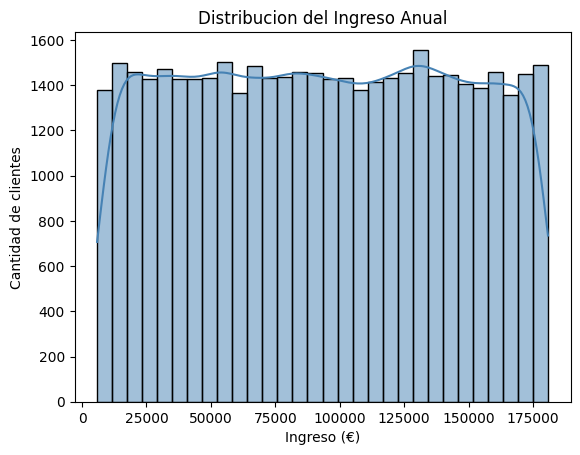

In [66]:
sns.histplot(df_customers["Income"], bins=30, kde=True, color="steelblue")
plt.title("Distribucion del Ingreso Anual")
plt.xlabel("Ingreso (€)")
plt.ylabel("Cantidad de clientes")
plt.show()


C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2138948003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customers, x="Kidhome", palette="pastel", ax=axs[0])
C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2138948003.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customers, x="Teenhome", palette="muted", ax=axs[1])


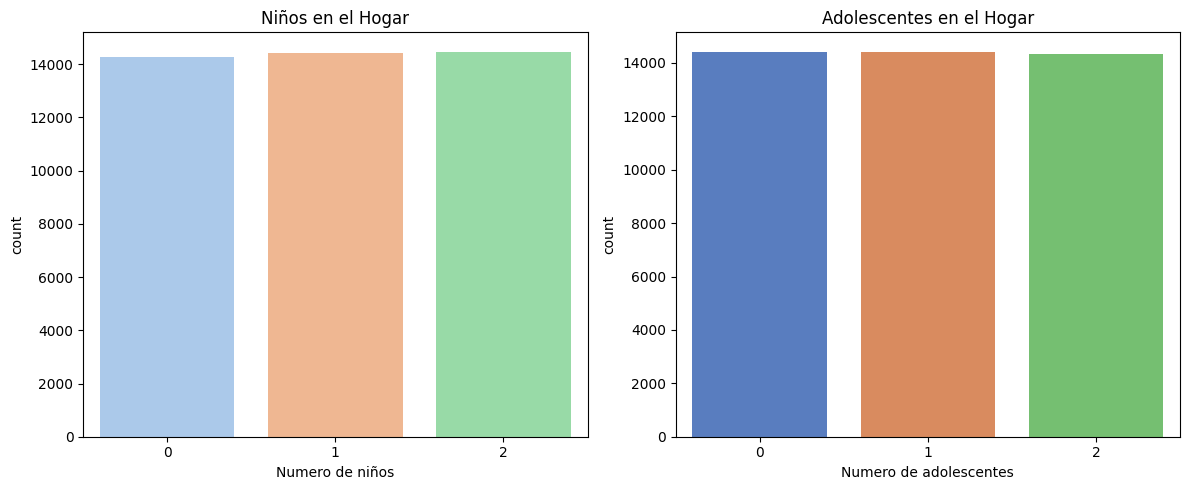

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_customers, x="Kidhome", palette="pastel", ax=axs[0])
axs[0].set_title("Niños en el Hogar")
axs[0].set_xlabel("Numero de niños")

sns.countplot(data=df_customers, x="Teenhome", palette="muted", ax=axs[1])
axs[1].set_title("Adolescentes en el Hogar")
axs[1].set_xlabel("Numero de adolescentes")

plt.tight_layout()
plt.show()

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\3572738474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customers, x="Total_Kids", palette="Set2")


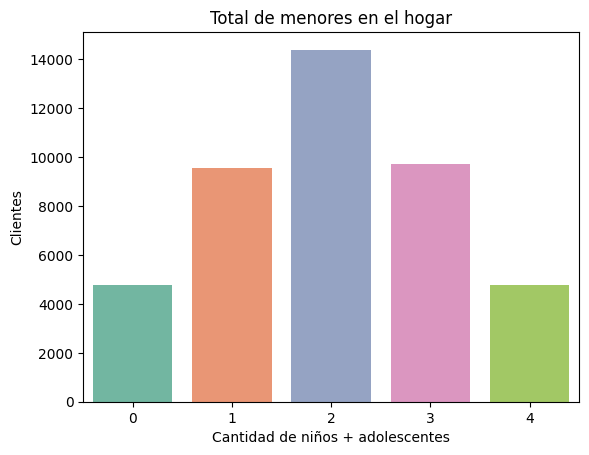

In [70]:
df_customers["Total_Kids"] = df_customers["Kidhome"] + df_customers["Teenhome"]

sns.countplot(data=df_customers, x="Total_Kids", palette="Set2")
plt.title("Total de menores en el hogar")
plt.xlabel("Cantidad de niños + adolescentes")
plt.ylabel("Clientes")
plt.show()

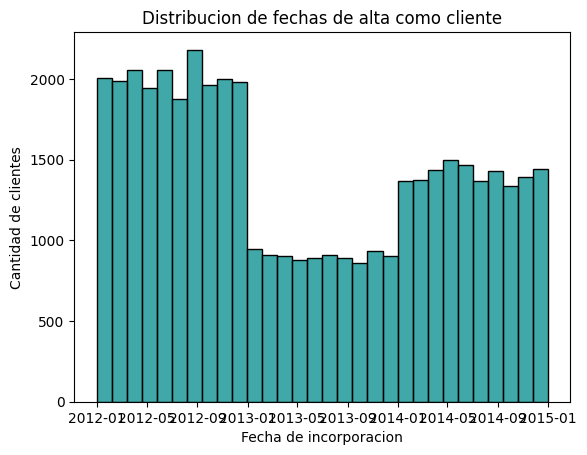

In [75]:
sns.histplot(df_customers["Dt_Customer"], bins=30, color="darkcyan")
plt.title("Distribucion de fechas de alta como cliente")
plt.xlabel("Fecha de incorporacion")
plt.ylabel("Cantidad de clientes")
plt.show()

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\1796273586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customers, x="NumWebVisitsMonth", palette="coolwarm")


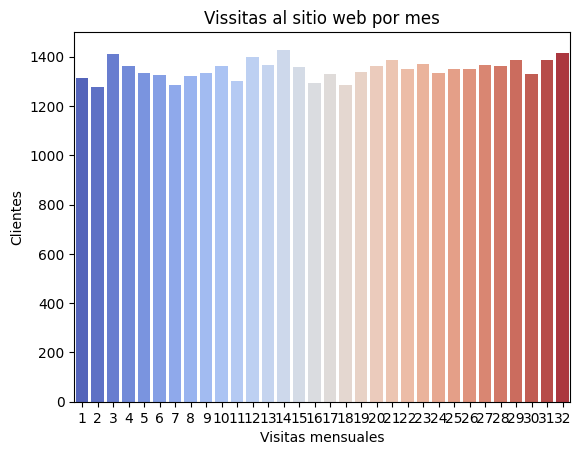

In [77]:
sns.countplot(data=df_customers, x="NumWebVisitsMonth", palette="coolwarm")
plt.title("Vissitas al sitio web por mes")
plt.xlabel("Visitas mensuales")
plt.ylabel("Clientes")
plt.show()

C:\Users\simpl\AppData\Local\Temp\ipykernel_6368\2236563715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_customers, x="NumWebVisitsMonth", y="Income", palette="Set3")


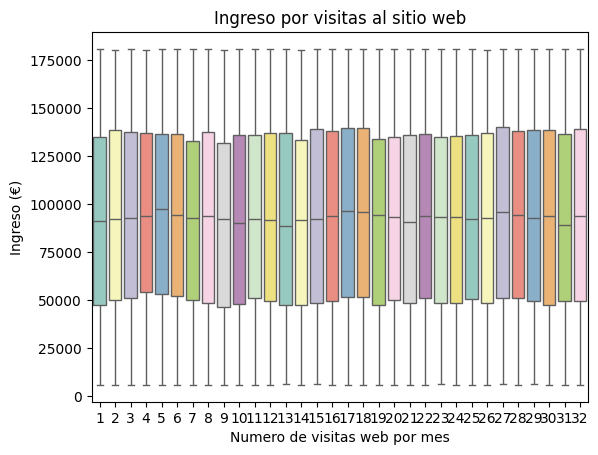

In [79]:
sns.boxplot(data=df_customers, x="NumWebVisitsMonth", y="Income", palette="Set3")
plt.title("Ingreso por visitas al sitio web")
plt.xlabel("Numero de visitas web por mes")
plt.ylabel("Ingreso (€)")
plt.show()